<a href="https://colab.research.google.com/github/ansiyo/ML-For-Beginners/blob/main/ARIMA_MODELS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-3-5591ac3729f6>:9: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('/content/e-waste realdata.csv', parse_dates=['Date'], index_col='Total')
<ipython-input-3-5591ac3729f6>:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.asfreq('M')


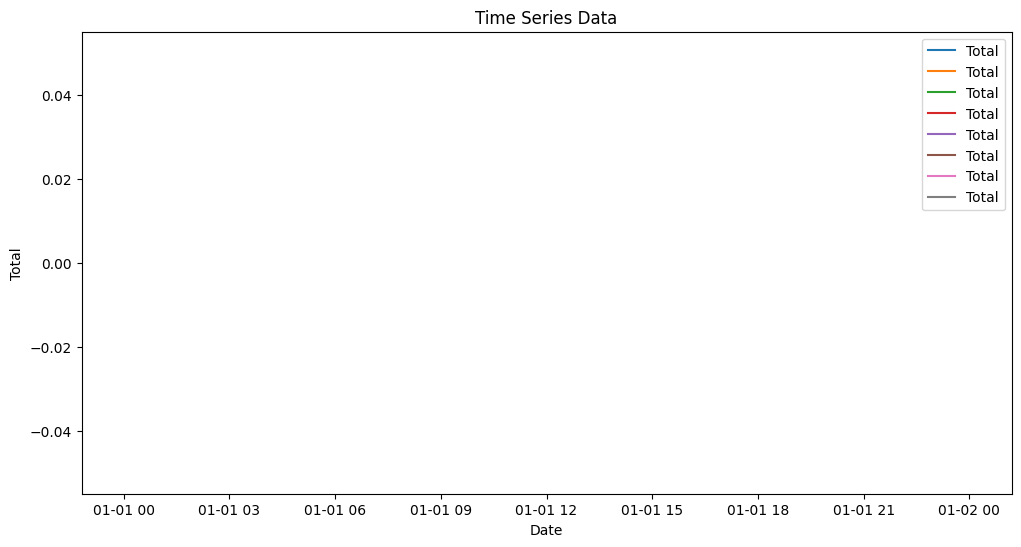

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

# Load time series data from a CSV file.
# The CSV file should have a column named 'date' for timestamps and another column with the observed values.
# Adjust the filename and column names as necessary.
df = pd.read_csv('/content/e-waste realdata.csv', parse_dates=['Date'], index_col='Total')

# Optionally, set the frequency of the time series (e.g., daily 'D', monthly 'M', etc.)
df = df.asfreq('M')

# Visualize the original time series
plt.figure(figsize=(12, 6))
plt.plot(df, label='Total')
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Total')
plt.legend()
plt.show()

# Decompose the time series into trend, seasonal, and residual components
# Choose an additive or multiplicative model based on the nature of your data.
decomposition = seasonal_decompose(df, model='additive')
decomposition.plot()
plt.tight_layout()
plt.show()

# Fit an ARIMA model to the time series
# The order (p, d, q) parameters are chosen arbitrarily for this example.
# You should use techniques such as ACF/PACF analysis or grid search to select optimal parameters.
model = ARIMA(df, order=(1, 1, 1))
model_fit = model.fit()

# Print a summary of the fitted ARIMA model
print(model_fit.summary())

# Forecast the next 30 time steps
forecast_steps = 30
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_df = forecast.summary_frame()

# Print the forecasted values and confidence intervals
print(forecast_df)

# Plot the forecast along with the historical data
plt.figure(figsize=(12, 6))
plt.plot(df, label='Total')
plt.plot(forecast_df['mean'], label='Forecast', color='red')
plt.fill_between(forecast_df.index, forecast_df['mean_ci_lower'], forecast_df['mean_ci_upper'],
                 color='pink', alpha=0.3, label='Confidence Interval')
plt.title('Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Total')
plt.legend()
plt.show()
